- Começo da pandemia em Pernambuco: 12 de março de 2020.
- inicio da vacinação em pernambuco: 18 de Janeiro de 2021
- Pernambuco atinge 50% da população vacinável com imunização completa contra a Covid-19: 07/10/2021.

### Definições

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

class individual:
  def __init__(self, _alpha, _beta) -> None:
    self.alpha = _alpha
    self.beta = _beta
    self.assessment = 0
  def setAssessment(self, f): 
    self.assessment = f(self)
  def __str__(self):
    return f'α:{self.alpha}, β: {self.beta}, avaliação: {self.assessment}'


### Dados

In [2]:
#01/02/2021 a 28/02/2021
start = [261745,
                     263722,
                     265349,
                     266999,
                     268486,
                     269937,
                     270801,
                     271542,
                     273278,
                     274809,
                     276452,
                     277832,
                     279637,
                     280528,
                     281331,
                     282913,
                     284840,
                     287066,
                     288424,
                     289556,
                     290500,
                     291189,
                     292913,
                     294479,
                     295681,
                     297404,
                     298859,
                     299475
      
]

### Funções do algoritmo evolucionairo

In [3]:
import math

def classification(i, compare):
  def SIR(t,Y):
    S,I = Y
    dS = -i.alpha*S*I
    dI = i.alpha*S*I -i.beta*I
    return np.array([dS,dI], float)
  _solution = solve_ivp(SIR,[0,len(compare)],[1-compare[0][1],compare[0][1]],t_eval=np.linspace(0, len(compare), 1000))
  all_minimal_distance = []
  for j in compare:
    distance = [math.sqrt(math.pow(j[0] - jj[1],2) + math.pow(j[1] - _solution.y[1][jj[0]],2)) 
                for jj in enumerate(_solution.t)]
    all_minimal_distance.append(min(distance))
  return sum(all_minimal_distance)

new_start = [ s/9051113 for s in start]

evaluate = lambda i: classification(i,list(enumerate(new_start)))

def getBest(a):
  avaliation = [i.assessment for i in a]
  minimum = min(avaliation)
  index = avaliation.index(minimum)
  return a[index] 


### Algoritmo

In [7]:
import random

def auto():
    executionTime = 100
    generation = 50
    generation_size = 10
    precision = 0

    population = []
    population.append([individual(random.uniform(0.03,0.05),random.uniform(0.03,0.04)) for i in range(generation_size)]) #Individuos iniciais
    b = 0
    for g in range(executionTime):
    #Avalia os individuos
        for i in population[g]:
            i.setAssessment(evaluate)
    #Seleciona o melhor individuo
        best = getBest(population[g])
    #Faz mutações no melhor individuo
        range_min_alpha = min(best.alpha, 1 - best.alpha)
        range_min_beta = min(best.beta, 1 - best.beta)
        population.append([
            individual(
                best.alpha+random.uniform(-range_min_alpha/math.pow(10,precision),range_min_alpha/math.pow(10,precision)),
                best.beta+random.uniform(-range_min_beta/math.pow(10,precision),range_min_beta/math.pow(10,precision))
            ) for i in range(generation_size-1)]+[best])
    
    #Atualiza as gerações
        if g%generation == 0 and g != 0:
            precision = precision + 1
        b = getBest(population[-2])
        if g == 1 and b.assessment >= 0.2:
            break
    return [b, b.alpha/b.beta]

In [13]:

entity,r0 = [],[]

amount = 16

while len(entity) < amount:
    a = auto()
    if a[0].assessment < 0.1963:
        entity.append(a[0])
        r0.append(a[1])
    print(f'Entidades: {len(entity)}/{amount} => {a[0].assessment}')

# table = pd.DataFrame({'α': al,'β': bt, 'R0': r0})

Entidades: 1/16 => 0.1962046596894013
Entidades: 2/16 => 0.1962123661207052
Entidades: 3/16 => 0.19620499173462852
Entidades: 4/16 => 0.19620499491951826
Entidades: 5/16 => 0.19620823443855234
Entidades: 6/16 => 0.1962048398653632
Entidades: 7/16 => 0.19620507753934813
Entidades: 8/16 => 0.1962527051048701
Entidades: 9/16 => 0.1962179780337992
Entidades: 10/16 => 0.19620468453785703
Entidades: 11/16 => 0.19625292849216272
Entidades: 12/16 => 0.19620639859901925
Entidades: 13/16 => 0.19622089710957016
Entidades: 14/16 => 0.1962194358031375
Entidades: 15/16 => 0.19622064072912887
Entidades: 16/16 => 0.196219929886308


In [14]:
import pandas as pd
al = [i.alpha for i in entity]
bt = [i.beta for i in entity]
av = [i.assessment for i in entity]
table = pd.DataFrame({'α': al,'β': bt,'av': av, 'R0': r0})
table.to_excel("01022021to28022021.xlsx")
table

,α,β,av,R0
0,0.043173,0.036161,0.196205,1.193922
1,0.055687,0.047970,0.196212,1.160864
2,0.044846,0.037762,0.196205,1.187612
3,0.042879,0.035906,0.196205,1.194212
4,0.032082,0.025658,0.196208,1.250369
5,0.041828,0.034903,0.196205,1.198418
6,0.040405,0.033540,0.196205,1.204685
7,0.072134,0.063243,0.196253,1.140588
8,0.014409,0.008748,0.196218,1.647165
9,0.044987,0.037877,0.196205,1.187709


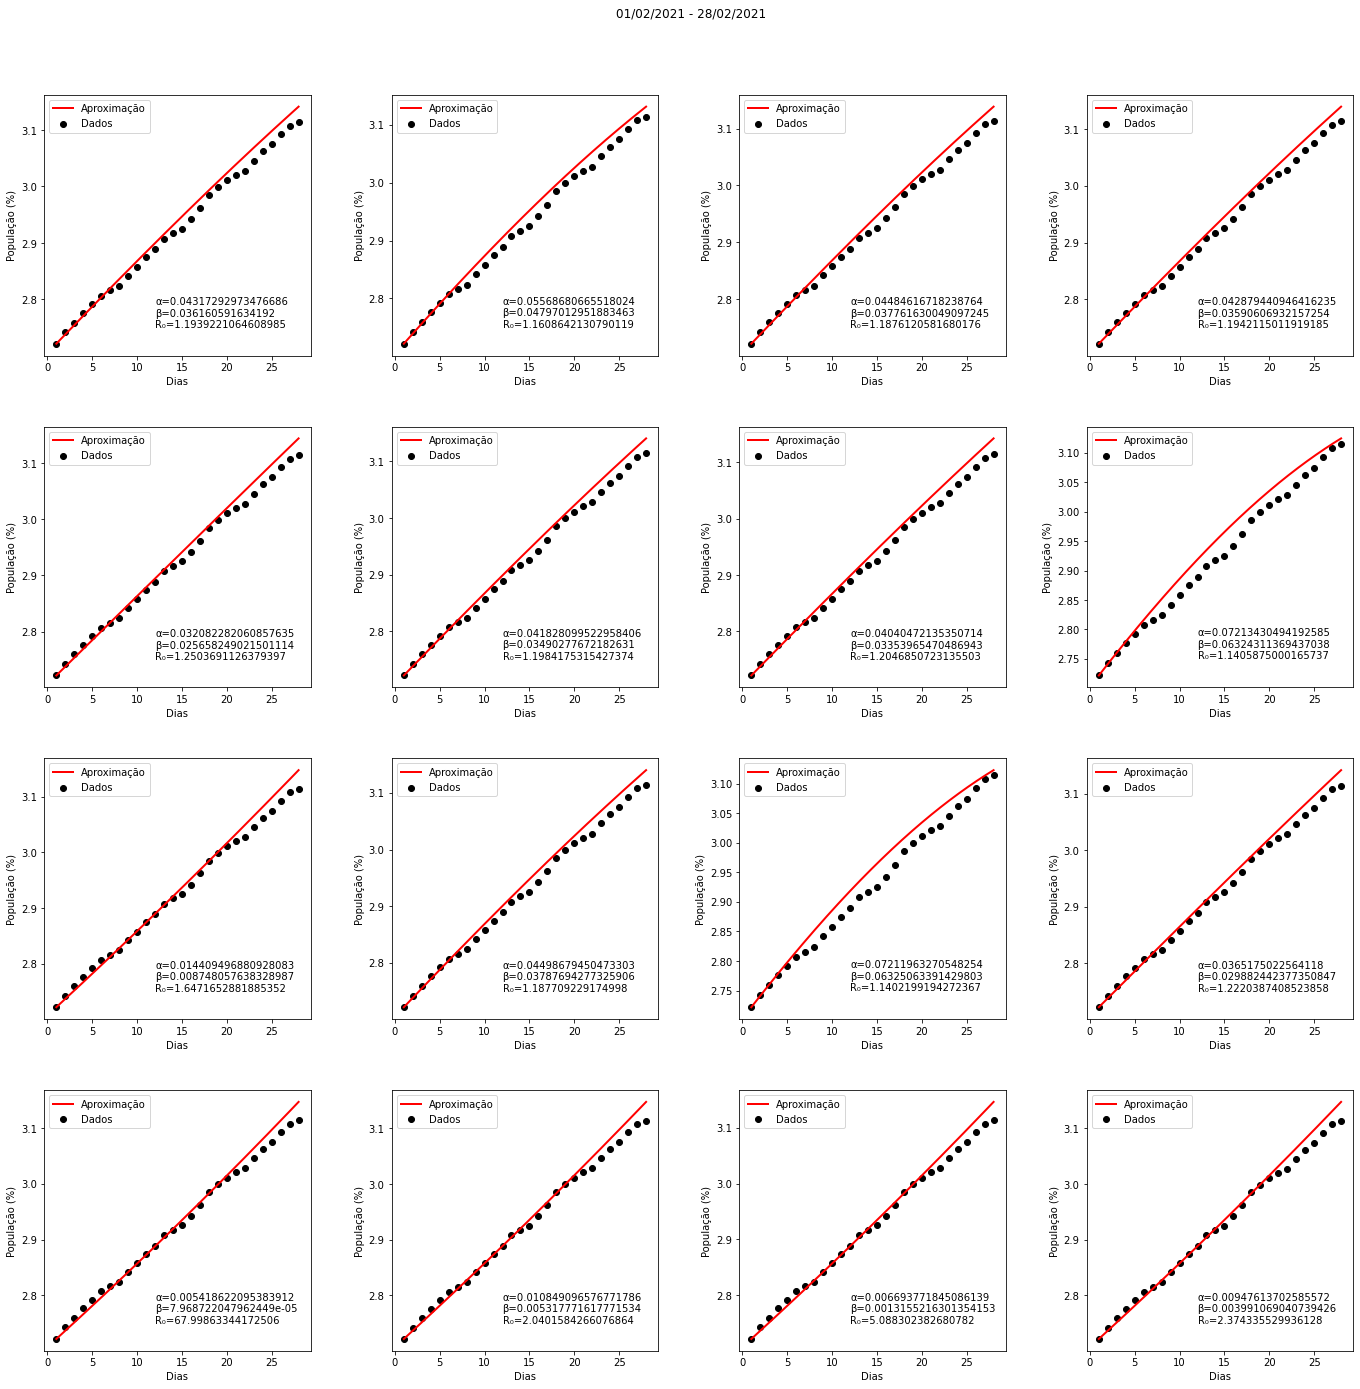

In [22]:
import matplotlib.pyplot as plt

y = [j/9616621 for j in start]

fig, ax = plt.subplots(len(entity)//4, 4, figsize=(20,20))
fig.suptitle('01/02/2021 - 28/02/2021')
fig.tight_layout(pad=5.0)
for i,jj in enumerate(list(zip(al,bt))):
  b = individual(jj[0],jj[1])

  def SIR(t,Y):
      S,I,R = Y
      dS = -b.alpha*S*I
      dI = b.alpha*S*I -b.beta*I
      dR = b.beta*I
      return np.array([dS,dI,dR], float)

  solution = solve_ivp(SIR,[0,len(y)],[1-y[0],y[0],0],t_eval=np.linspace(0, len(y), 1000))
  ax[i//4, i%4].plot(np.linspace(1, len(y), 1000),solution.y[1]*100, color="red",linewidth=2, alpha=1, label="Aproximação")
  ax[i//4, i%4].scatter(list(range(1,len(y)+1)), np.array(y)*100, color='black', label="Dados")
  ax[i//4, i%4].text(12,2.75,f'α={b.alpha}\nβ={b.beta}\nR₀={r0[i]}')
  ax[i//4, i%4].legend()
for a in ax.flat:
    a.set(xlabel='Dias', ylabel='População (%)')
plt.show()